In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
troop_df = pd.read_csv("troop_movements.csv")

In [8]:
troop_df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2025-07-09 08:39:17,1,resistance_soldier,empire,9,4,5,6,Champala
1,2025-07-09 08:39:16,2,stormtrooper,resistance,1,2,9,2,Bestine IV
2,2025-07-09 08:39:15,3,unknown,resistance,10,1,1,2,Malastare
3,2025-07-09 08:39:14,4,at-st,empire,2,5,4,1,Ojom
4,2025-07-09 08:39:13,5,unknown,resistance,5,7,7,5,Socorro


In [9]:
troop_df.columns

Index(['timestamp', 'unit_id', 'unit_type', 'empire_or_resistance',
       'location_x', 'location_y', 'destination_x', 'destination_y',
       'homeworld'],
      dtype='object')

C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_7332\50904319.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='empire_or_resistance', data=troop_df,palette=colors)


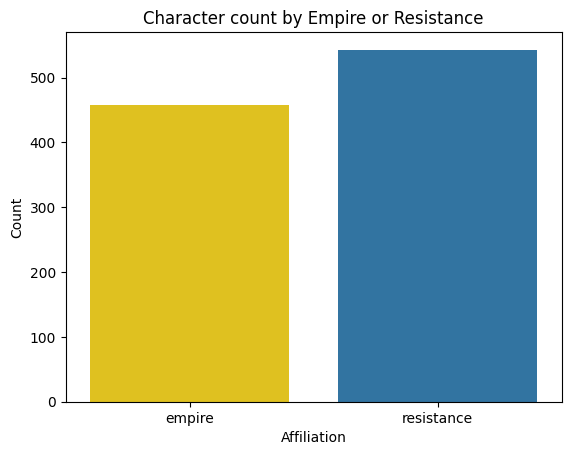

In [10]:
colors = {
    'resistance': '#1f77b4',  
    'empire': '#FFD700'       
}


sns.countplot(x='empire_or_resistance', data=troop_df,palette=colors)
plt.title('Character count by Empire or Resistance')
plt.xlabel('Affiliation')
plt.ylabel('Count')
plt.savefig('affiliation_chart.png')
plt.show()




In [11]:
X = troop_df[['homeworld', 'unit_type']]
y = troop_df['empire_or_resistance']
X,y

(       homeworld           unit_type
 0       Champala  resistance_soldier
 1     Bestine IV        stormtrooper
 2      Malastare             unknown
 3           Ojom               at-st
 4        Socorro             unknown
 ..           ...                 ...
 995  Aleen Minor        stormtrooper
 996        Kalee         tie_fighter
 997    Chandrila  resistance_soldier
 998      Stewjon               at-st
 999     Kashyyyk               at-st
 
 [1000 rows x 2 columns],
 0          empire
 1      resistance
 2      resistance
 3          empire
 4      resistance
           ...    
 995    resistance
 996        empire
 997    resistance
 998        empire
 999    resistance
 Name: empire_or_resistance, Length: 1000, dtype: object)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

train_test_split:
X_train shape: (800, 2)
X_test shape: (200, 2)
y_train shape: (800,)
y_test shape: (200,)


In [13]:
from sklearn.compose import ColumnTransformer

In [14]:
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['homeworld', 'unit_type'])
    ],
    remainder='passthrough'
)

In [15]:

X_train_encoded = encoder.fit_transform(X_train)


X_test_encoded = encoder.transform(X_test)

In [16]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_encoded, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
y_pred = model.predict(X_test_encoded)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.625


In [73]:

feature_names = encoder.get_feature_names_out()
cleaned_feature_names = [name.replace('onehot__', '') for name in feature_names]


importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': cleaned_feature_names, 'Importance': importances})

print(cleaned_feature_names)


['homeworld_Alderaan', 'homeworld_Aleen Minor', 'homeworld_Bestine IV', 'homeworld_Cerea', 'homeworld_Champala', 'homeworld_Chandrila', 'homeworld_Concord Dawn', 'homeworld_Corellia', 'homeworld_Dagobah', 'homeworld_Dathomir', 'homeworld_Dorin', 'homeworld_Eriadu', 'homeworld_Glee Anselm', 'homeworld_Haruun Kal', 'homeworld_Iktotch', 'homeworld_Iridonia', 'homeworld_Kalee', 'homeworld_Kashyyyk', 'homeworld_Malastare', 'homeworld_Mirial', 'homeworld_Mon Cala', 'homeworld_Muunilinst', 'homeworld_Naboo', 'homeworld_Ojom', 'homeworld_Quermia', 'homeworld_Rodia', 'homeworld_Ryloth', 'homeworld_Serenno', 'homeworld_Shili', 'homeworld_Skako', 'homeworld_Socorro', 'homeworld_Stewjon', 'homeworld_Sullust', 'homeworld_Tatooine', 'homeworld_Tholoth', 'homeworld_Toydaria', 'homeworld_Trandosha', 'homeworld_Troiken', 'homeworld_Tund', 'homeworld_Umbara', 'homeworld_Vulpter', 'homeworld_Zolan', 'unit_type_at-at', 'unit_type_at-st', 'unit_type_resistance_soldier', 'unit_type_stormtrooper', 'unit_type

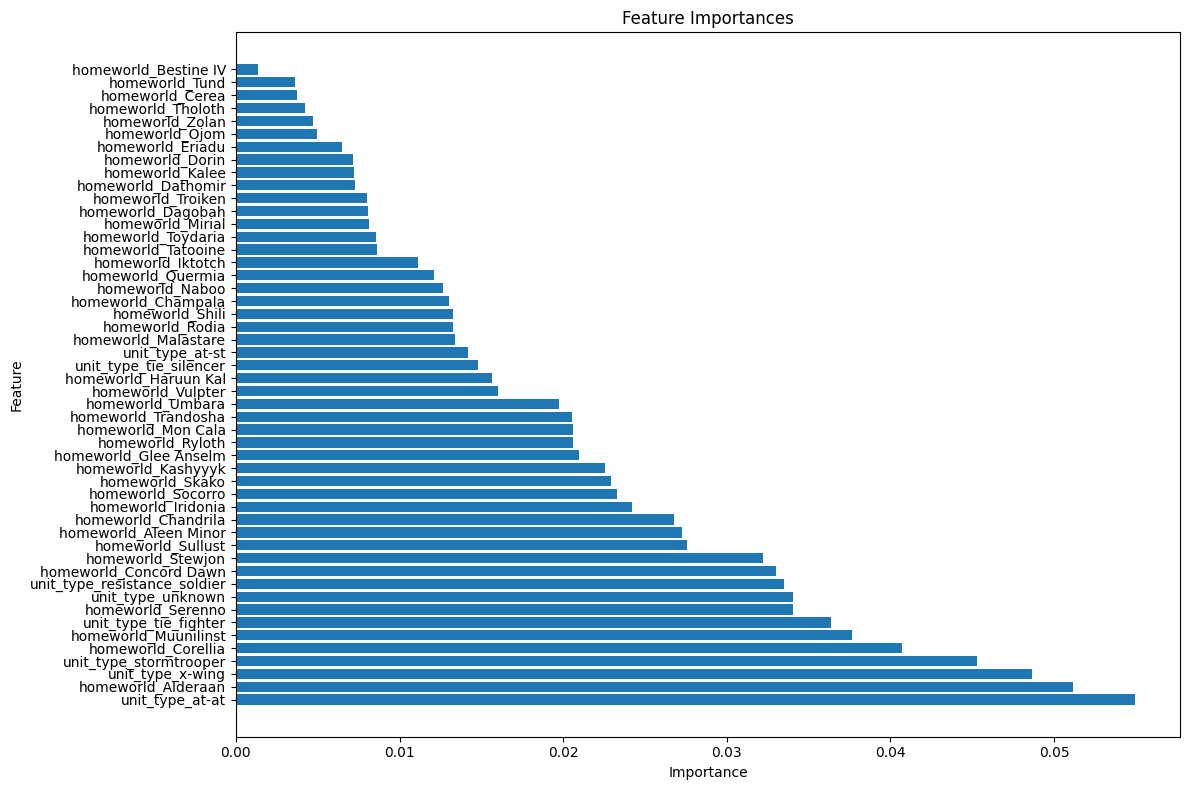

In [74]:
import matplotlib.pyplot as plt

sorted_importances = feature_importances.sort_values('Importance', ascending=False)


plt.figure(figsize=(12, 8))
plt.barh(sorted_importances['Feature'], sorted_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


In [75]:
import pickle


with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'trained_model.pkl'")


Model saved as 'trained_model.pkl'


In [76]:


troop_1m_df = pd.read_csv('troop_movements_1m.csv')

if 'unit_type' in troop_1m_df.columns:
    troop_1m_df['unit_type'] = troop_1m_df['unit_type'].replace('invalid_unit', 'unknown')

for col in ['location_x', 'location_y']:
    if col in troop_1m_df.columns:
        troop_1m_df[col] = troop_1m_df[col].ffill()


parquet_path = 'troop_movements_1m.parquet'
troop_1m_df.to_parquet(parquet_path, engine='pyarrow')


In [85]:

with open('trained_model.pkl', 'rb') as file:
    model = pickle.load(file)


cleaned_df = pd.read_parquet('troop_movements_1m.parquet', engine='pyarrow')


#prepare features for prediction
X_real = cleaned_df[['homeworld', 'unit_type']]

try:
    X_real_encoded = encoder.transform(X_real)
except NameError:
    X_real_encoded = X_real 




display(cleaned_df.head())

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-03 03:19:15,919214,tie_silencer,2.0,5.0,9,3,Aleen Minor
1,2023-02-24 13:50:40,9467154,stormtrooper,9.0,0.0,9,1,Malastare
2,2023-03-29 19:54:55,6585778,tie_silencer,0.0,6.0,5,9,Serenno
3,2023-04-30 00:58:11,3878023,tie_silencer,4.0,2.0,9,9,Tund
4,2023-04-10 22:00:26,5537117,at-st,6.0,8.0,5,8,Skako


In [78]:

predictions = model.predict(X_real_encoded)


cleaned_df['empire_or_resistance_pred'] = predictions

In [83]:
cleaned_df.head

<bound method NDFrame.head of                   timestamp  unit_id     unit_type  location_x  location_y  \
0       2023-06-03 03:19:15   919214  tie_silencer         2.0         5.0   
1       2023-02-24 13:50:40  9467154  stormtrooper         9.0         0.0   
2       2023-03-29 19:54:55  6585778  tie_silencer         0.0         6.0   
3       2023-04-30 00:58:11  3878023  tie_silencer         4.0         2.0   
4       2023-04-10 22:00:26  5537117         at-st         6.0         8.0   
...                     ...      ...           ...         ...         ...   
999995  2023-05-03 18:48:56  3553240   tie_fighter         8.0         4.0   
999996  2023-05-25 13:45:35  1662636         at-at         0.0         3.0   
999997  2023-05-17 12:16:37  2362262   tie_fighter         6.0         8.0   
999998  2023-03-17 08:04:26  7669749   tie_fighter         9.0         3.0   
999999  2023-05-19 12:29:02  2187995         at-st         9.0         4.0   

        destination_x  destinatio

In [79]:
cleaned_df.to_csv("troop_df_w_preds.csv")